# Exploration of causes of airlines delays 
## by Mathieu Le Cam

## Preliminary Wrangling

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 2004 to 2020.

In [147]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [117]:
df=pd.read_csv('airline_delay_causes.csv')
print(df.info())
df.iloc[:,:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272070 entries, 0 to 272069
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 272070 non-null  int64  
 1    month               272070 non-null  int64  
 2   carrier              272070 non-null  object 
 3   carrier_name         272070 non-null  object 
 4   airport              272070 non-null  object 
 5   airport_name         272070 non-null  object 
 6   arr_flights          271671 non-null  float64
 7   arr_del15            271476 non-null  float64
 8   carrier_ct           271671 non-null  float64
 9    weather_ct          271671 non-null  float64
 10  nas_ct               271671 non-null  float64
 11  security_ct          271671 non-null  float64
 12  late_aircraft_ct     271671 non-null  float64
 13  arr_cancelled        271671 non-null  float64
 14  arr_diverted         271671 non-null  float64
 15   arr_delay       

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,21.06,6.44
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,14.09,2.61
2,2004,1,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513.0,97.0,27.60,0.42
3,2004,1,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",334.0,78.0,20.14,2.02
4,2004,1,DL,Delta Air Lines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",217.0,47.0,8.08,0.44
...,...,...,...,...,...,...,...,...,...,...
272065,2019,1,MQ,Envoy Air,RIC,"Richmond, VA: Richmond International",195.0,68.0,12.12,1.87
272066,2019,1,MQ,Envoy Air,ROA,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",52.0,14.0,2.74,0.69
272067,2019,1,MQ,Envoy Air,ROC,"Rochester, NY: Greater Rochester International",106.0,26.0,4.67,2.26
272068,2019,1,MQ,Envoy Air,RST,"Rochester, MN: Rochester International",116.0,35.0,6.83,6.92


In [118]:
df.iloc[:,10:]

,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,51.58,1.0,45.92,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0,NaN
1,34.25,0.0,10.05,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0,NaN
2,51.86,0.0,17.12,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0,NaN
3,39.39,0.0,16.45,3.0,1.0,3400.0,1159.0,166.0,1295.0,0.0,780.0,NaN
4,21.89,0.0,16.59,4.0,1.0,1737.0,350.0,28.0,522.0,0.0,837.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
272065,17.97,0.0,36.04,22.0,0.0,4138.0,603.0,196.0,780.0,0.0,2559.0,NaN
272066,2.46,0.0,8.11,2.0,1.0,726.0,323.0,31.0,112.0,0.0,260.0,NaN
272067,11.81,0.0,7.26,17.0,0.0,1259.0,313.0,99.0,484.0,0.0,363.0,NaN
272068,11.50,0.0,9.75,22.0,0.0,2307.0,474.0,633.0,523.0,0.0,677.0,NaN


> Data cleaning: drop last column with null values, remove spaces from column names, drop rows with missing variables (0.2%), sort dataset based on year and month 

> Add columns to the dataset for nomalized number of flights delayed and their causes. 

In [119]:
df=df.drop(columns=['Unnamed: 21'])
df.columns=[col.replace(' ','') for col in df.columns]
df=df.dropna()
df=df.sort_values(by=['year','month'])
df['arr_del_pct']=100*df['arr_del15']/df['arr_flights']
for col in ['carrier', 'weather', 'nas','security','late_aircraft']:
    df[col+'_pct']=100*df[col+'_ct']/df['arr_flights']
df.shape

(271476, 27)

### What is the structure of your dataset?

> the data set is composed of 271476 rows and 27 columns after cleaning; 16 columns present float values, 2 integers and 4 strings. In this dataset, the delays are aggregated per airport and per carrier.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in this dataset is in the delay in arrival of airlines (arr_delay in minutes). Since a flight is considered delayed when it arrived 15 or more minutes than the schedule, the number of flights delayed is also of importance (arr_del15) and the derived percentage of flights delayed (arr_del_pct).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  A few features bring some information on the delay in arrival of airlines. Five features present the causes of delay:Carrier, Weather, Security, National Aviation System (NAS) or Aircraft arriving late. Other features indicate if the flight was cancelled or diverted.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [120]:
print('Dataset with values from {}/{} to {}/{}.'.format(df.month.head(1).values[0],df.year.head(1).values[0],df.month.tail(1).values[0],df.year.tail(1).values[0]))
print('Data available for {} unique airlines and {} unique airports.'.format(len(df.carrier.unique()),len(df.airport.unique())))

Dataset with values from 1/2004 to 4/2020.
Data available for 28 unique airlines and 407 unique airports.


In [157]:
#df.groupby(['year'])['carrier'].nunique()

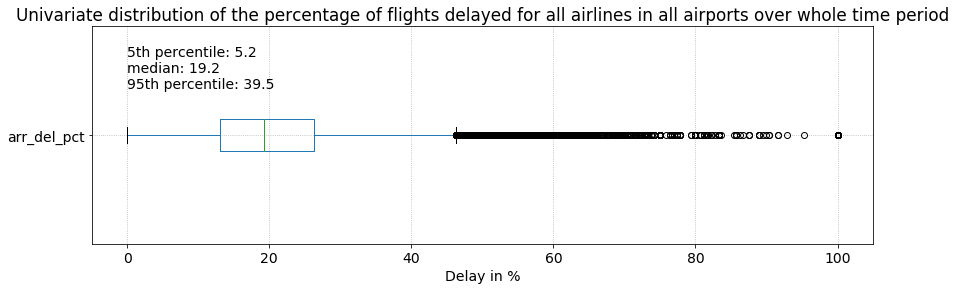

In [156]:
plt.figure(figsize=(14,4))
df.loc[:,['arr_del_pct']].boxplot(vert=False,medianprops={'color':'red'})
plt.grid(linestyle=':')
perc=[round(i,1) for i in np.percentile(df.loc[:,['arr_del_pct']],[5,50,95])]
plt.text(0,1.2,'5th percentile: {}\nmedian: {}\n95th percentile: {}'.format(perc[0],perc[1],perc[2]),verticalalignment='bottom')
plt.title('Univariate distribution of the percentage of flights delayed for all airlines in all airports over whole time period')
plt.xlabel('Delay in %')
plt.show()

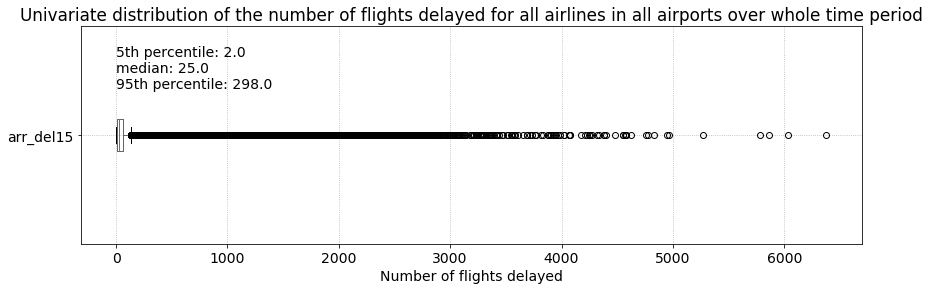

In [153]:
plt.figure(figsize=(14,4))
df.loc[:,['arr_del15']].boxplot(vert=False,medianprops={'color':'red'})
plt.grid(linestyle=':')
perc=np.percentile(df.loc[:,['arr_del15']],[5,50,95])
plt.text(0,1.2,'5th percentile: {}\nmedian: {}\n95th percentile: {}'.format(perc[0],perc[1],perc[2]),verticalalignment='bottom')
plt.title('Univariate distribution of the number of flights delayed for all airlines in all airports over whole time period')
plt.xlabel('Number of flights delayed')
plt.show()

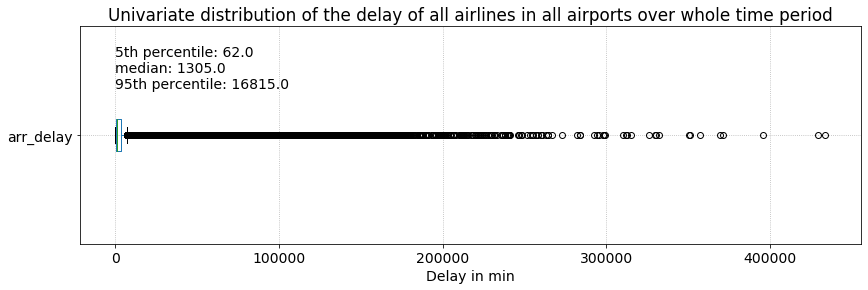

In [154]:
plt.figure(figsize=(14,4))
df.loc[:,['arr_delay']].boxplot(vert=False,medianprops={'color':'red'})
plt.grid(linestyle=':')
plt.title('Univariate distribution of the delay of all airlines in all airports over whole time period')
plt.xlabel('Delay in min')
perc=np.percentile(df.loc[:,['arr_delay']],[5,50,95])
plt.text(0,1.2,'5th percentile: {}\nmedian: {}\n95th percentile: {}'.format(perc[0],perc[1],perc[2]),verticalalignment='bottom')
plt.show()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!